In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shop1_shop_v2: restaurant, Bächlihof, one week lag of last week data

In [520]:
filename = 'shop1_v3.csv'
#description = 'Baechlihof, Shop, 1 week setback'

df = pd.read_csv('../data/'+filename, encoding="latin1")
#df

In [521]:
df.set_index(['month_idx','hour_idx','mday_idx','year_idx'],inplace = True)
#df

In [522]:
#df_juckerhof = df.loc[u'Juckerhof Seegräben']
#df_juckerhof

In [523]:
#x_juck_res = df_juckerhof[(df_juckerhof['is_resto'] == True)]
x_juck_res = df[(~df['temperature'].isnull())]
x_juck_res = x_juck_res.fillna(0)

df_result = x_juck_res

#one-hot
x_juck_res = pd.get_dummies(x_juck_res, prefix=['monthday','weekday', 'month','year','hour'], columns=['mday','wday', 'month','year','hour'])

x_juck_res

temperature  precipitation  \
month_idx hour_idx mday_idx year_idx                               
1         0        19       2018             5.72            0.7   
          9        1        2018             5.51            0.0   
                   2        2018             3.15            0.0   
                   4        2018             6.65            1.6   
                   6        2018             5.41            0.0   
                   7        2018             4.41            0.0   
                   13       2018             0.71            0.0   
                   18       2018             4.60            0.0   
                   20       2018             4.03            0.0   
          10       1        2018             6.28            0.0   
                   2        2018             4.54            0.0   
                   3        2018            10.45            0.9   
                   4        2018             7.69            1.2   
                   5        2018            10.25            0.0   
                   6        2018             7.40            0.0   
                   7        2018             7.56            0.0   
                   8        2018             7.06            0.0   
                   9        2018             4.16            0.0   
                   10       2018             6.33            0.0   
                   11       2018             4.83            0.0   
                   12       2018             2.78            0.0   
                   13       2018             1.85            0.0   
                   14       2018             1.56            0.0   
                   15       2018             4.06            0.0   
                   16       2018             7.58            0.2   
                   17       2018             2.01            0.0   
                   18       2018             5.58            0.0   
                   19       2018             4.15            0.2   
                   20       2018             5.51            0.0   
          11       1        2018             6.88            0.0   
...                                           ...            ...   
12        17       11       2017             5.53            0.3   
                   13       2017             4.61            0.0   
                   14       2017             5.34            0.0   
                   15       2017             3.38            0.0   
                   17       2017             0.84            0.0   
                   19       2017             2.29            0.0   
                   20       2017             3.04            0.0   
                   21       2017             4.26            1.0   
                   22       2017             5.91            0.0   
                   23       2017             6.41            0.0   
                   26       2017             4.43            0.0   
                   27       2017             3.16            0.0   
                   28       2017            -1.40            0.0   
                   29       2017             0.03            0.0   
                   30       2017             8.98            0.0   
                   31       2017             8.83            0.0   
          18       7        2017             2.98            0.0   
                   15       2017             2.35            0.0   
                   20       2017             1.41            0.0   
                   21       2017             4.01            1.4   
                   22       2017             5.69            0.0   
          19       15       2017             1.88            0.0   
          21       1        2017            -1.73            0.0   
                   15       2017             2.22            0.0   
          22       1        2017            -0.58            0.0   
                   8        2017            -0.60            0.0   
                   23     

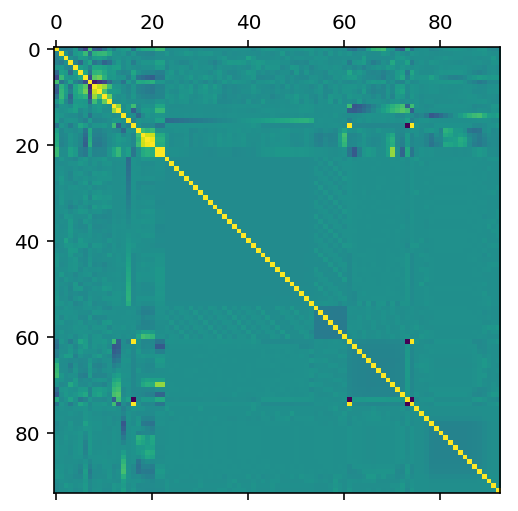

In [524]:
%config InlineBackend.figure_format = 'retina'

plt.matshow(x_juck_res.corr())
plt.show()

#x_juck_res.corr()

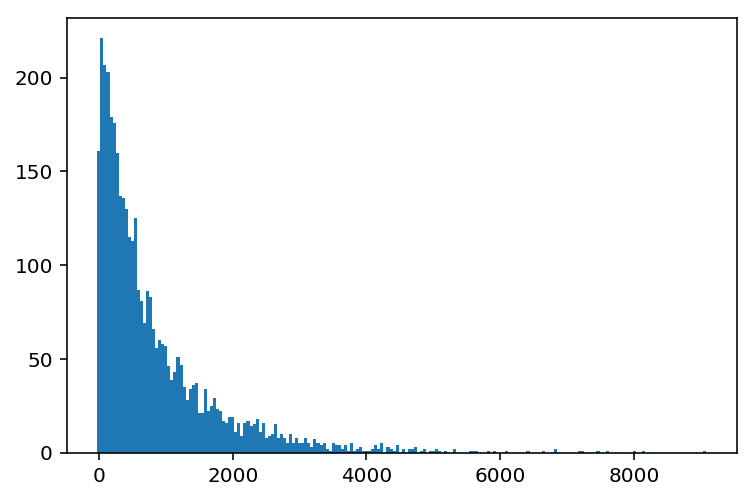

In [525]:
plt.hist(x_juck_res['price'],bins=200)
plt.show()


In [526]:
x_juck_res.columns.values

array([u'temperature', u'precipitation', u'snowfraction',
       u'sealevelpressure', u'winddirection', u'windspeed',
       u'relativehumidity', u'sunshinetime', u'totalcloudcover',
       u'lowclouds', u'midclouds', u'highclouds', u'timestamp',
       u'month.1', u'hour.1', u'mday.1', u'year.1', u'is_resto', u'price',
       u'count', u'n_transactions', u'last_week_price',
       u'last_month_price', 'monthday_1.0', 'monthday_2.0',
       'monthday_3.0', 'monthday_4.0', 'monthday_5.0', 'monthday_6.0',
       'monthday_7.0', 'monthday_8.0', 'monthday_9.0', 'monthday_10.0',
       'monthday_11.0', 'monthday_12.0', 'monthday_13.0', 'monthday_14.0',
       'monthday_15.0', 'monthday_16.0', 'monthday_17.0', 'monthday_18.0',
       'monthday_19.0', 'monthday_20.0', 'monthday_21.0', 'monthday_22.0',
       'monthday_23.0', 'monthday_24.0', 'monthday_25.0', 'monthday_26.0',
       'monthday_27.0', 'monthday_28.0', 'monthday_29.0', 'monthday_30.0',
       'monthday_31.0', 'weekday_0.0', 'week

In [527]:
to_drop = [u'price',u'count',u'n_transactions']

features = x_juck_res.drop(to_drop,axis = 1).columns
#features

In [528]:
X = x_juck_res[features]
y = x_juck_res[u'count']

In [529]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso

scores = []
for iseed in range(10):
    np.random.seed(iseed)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_z = scaler.transform(X_train)
    X_test_z = scaler.transform(X_test)
    mdl_lasso = Lasso(alpha = 0.001)
    mdl_lasso.fit(X_train_z,y_train)
    y_predict = mdl_lasso.predict(X_test_z)

    print mdl_lasso.score(X_test_z,y_test)
    #df_score = pd.DataFrame(data = [mdl_lasso.score(X_test_z,y_test)])
    scores.append(mdl_lasso.score(X_test_z,y_test))
    coefficients = pd.DataFrame(data=mdl_lasso.coef_,index=features)
    coefficients.columns.values
    print coefficients[0].sort_values()

np_scores = np.array(scores)
df_score = pd.DataFrame(index = ['mean','std'],data = [np.mean(np_scores),np.std(np_scores)])
df_score.to_csv('../results/cnt_score_10f_'+filename)
coefficients.to_csv('../results/cnt_Last_coeff_'+filename)

0.5950603960852532
hour_9.0           -28.989115
weekday_1.0        -26.668596
hour_19.0          -24.218404
weekday_0.0        -23.551430
weekday_3.0        -22.154727
weekday_2.0        -19.514340
weekday_4.0        -19.374638
hour_18.0          -16.252034
relativehumidity   -15.710600
hour_8.0           -15.678529
month_12.0         -14.500705
hour_20.0          -14.056126
hour_10.0          -10.736380
month_7.0          -10.555424
hour_11.0          -10.088019
month_6.0           -8.984930
month_11.0          -8.300740
windspeed           -7.736120
year.1              -7.208032
hour_7.0            -7.104711
month_8.0           -6.618686
lowclouds           -5.906169
monthday_29.0       -5.230658
monthday_6.0        -4.741225
sealevelpressure    -4.581086
monthday_2.0        -4.080927
snowfraction        -2.930952
monthday_3.0        -2.893928
winddirection       -2.672693
monthday_9.0        -2.484020
                      ...    
monthday_24.0        1.535142
monthday_5.0         

0.5814474263397543
weekday_1.0        -29.146064
hour_9.0           -28.026606
weekday_0.0        -24.167248
weekday_3.0        -23.644034
hour_19.0          -23.635675
weekday_4.0        -22.053424
weekday_2.0        -21.412058
hour_20.0          -16.074470
hour_18.0          -15.998406
relativehumidity   -15.358718
hour_8.0           -14.530303
month_12.0         -13.792594
month_7.0          -12.146540
hour_11.0          -10.610579
month_6.0           -9.524515
hour_10.0           -9.397903
month_11.0          -8.300005
windspeed           -8.138729
month_8.0           -7.386686
year.1              -6.132716
lowclouds           -5.991004
hour_7.0            -5.463388
sealevelpressure    -4.975511
monthday_6.0        -3.534747
monthday_29.0       -3.514809
monthday_2.0        -3.394971
monthday_3.0        -3.034121
winddirection       -2.781816
monthday_27.0       -2.571612
monthday_11.0       -2.528867
                      ...    
monthday_24.0        1.246079
month_3.0            

0.40205712366989854
hour_8.0        -1377.778290
hour_7.0        -1080.625016
hour_9.0        -1013.023765
weekday_1.0      -912.833357
hour_2.0         -877.445464
weekday_0.0      -832.289447
hour_23.0        -811.017757
hour_21.0        -806.829031
hour_0.0         -795.482300
weekday_2.0      -777.703760
hour_22.0        -765.863357
weekday_4.0      -638.953737
weekday_3.0      -635.330938
hour_20.0        -634.198225
month_12.0       -541.323720
hour_11.0        -490.810420
month_11.0       -469.923254
year.1           -451.366109
hour_10.0        -442.112546
month_7.0        -438.986602
month_8.0        -434.506947
month_6.0        -394.278432
monthday_29.0    -343.346901
monthday_2.0     -286.460595
monthday_27.0    -262.006210
monthday_6.0     -214.280049
hour_19.0        -199.060556
monthday_22.0    -169.508322
monthday_7.0     -153.995983
monthday_9.0     -149.166084
                    ...     
monthday_5.0       41.762388
temperature        43.427356
month_5.0          55.0

In [231]:
#print X_test.index.values

df_test = df_result.loc[X_test.index]


In [232]:
df_test['pred'] = y_predict
df_test['err'] = y_predict - y_test



In [233]:
def prediction_profile(df,by):
    
    meanpred = df.groupby(by)['pred'].mean()
    meantrue = df.groupby(by)['price'].mean()
    stdtrue = df.groupby(by)['price'].std()
        
    mean = df.groupby(by)['err'].mean()
    std = df.groupby(by)['err'].std()
    
    r2 = 1. - (std/stdtrue)**2
    
    plt.scatter(meantrue.index,meanpred)
    plt.plot(meanpred,color='red')
    plt.title('predicted Mean Price +/- std')
    plt.xlabel(by)
    plt.fill_between(mean.index, meanpred - std, meanpred+std, color='red', alpha=0.5)
    plt.show()
    
    #plt.scatter(meantrue.index,meanpred)
    #plt.plot(meanpred,color='orange')
    #plt.fill_between(meanpred.index, meanpred - unc, meanpred + unc, color='orange', alpha=0.5)
    # plt.plot(unc)
    #plt.show()

    plt.plot(r2)
    plt.xlabel(by)
    plt.title('R^2')
    plt.show()


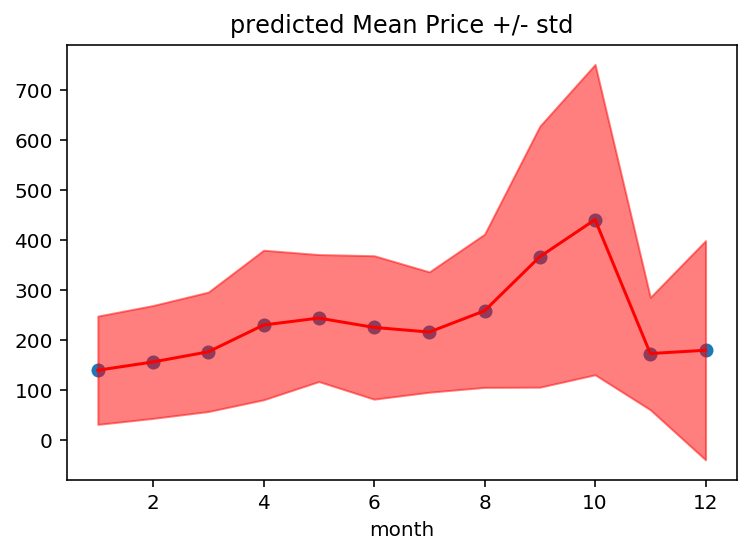

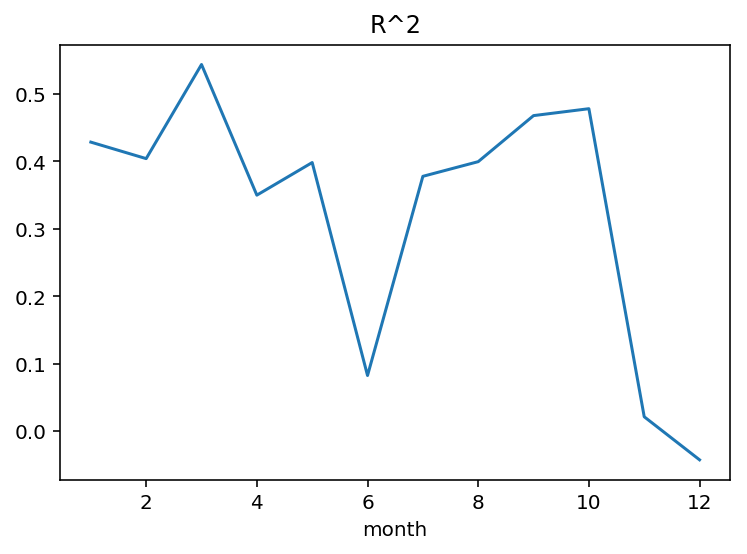

In [234]:
prediction_profile(df_test,'month')

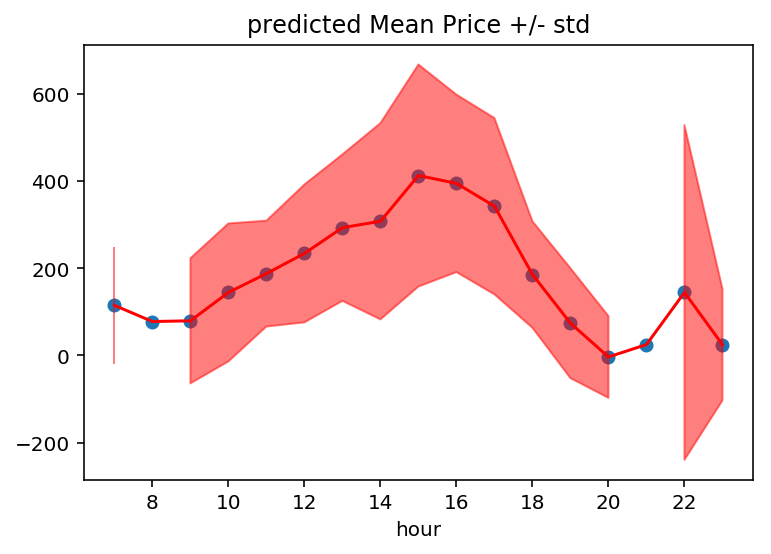

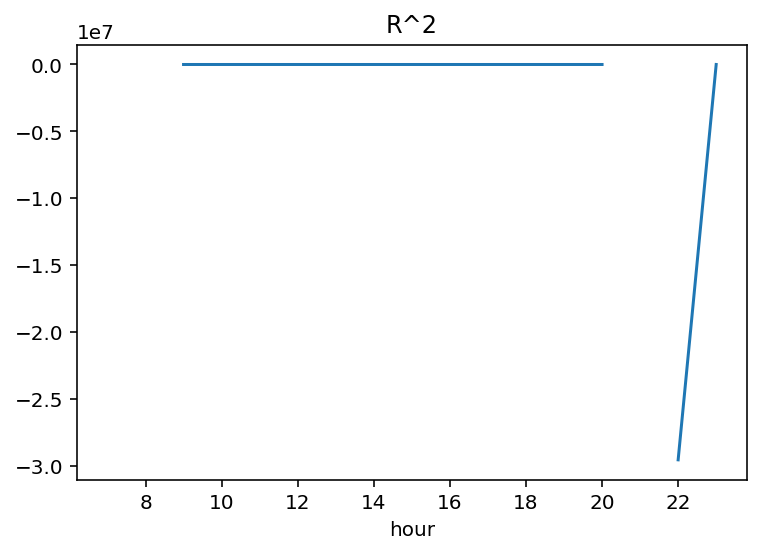

In [235]:
prediction_profile(df_test,'hour')

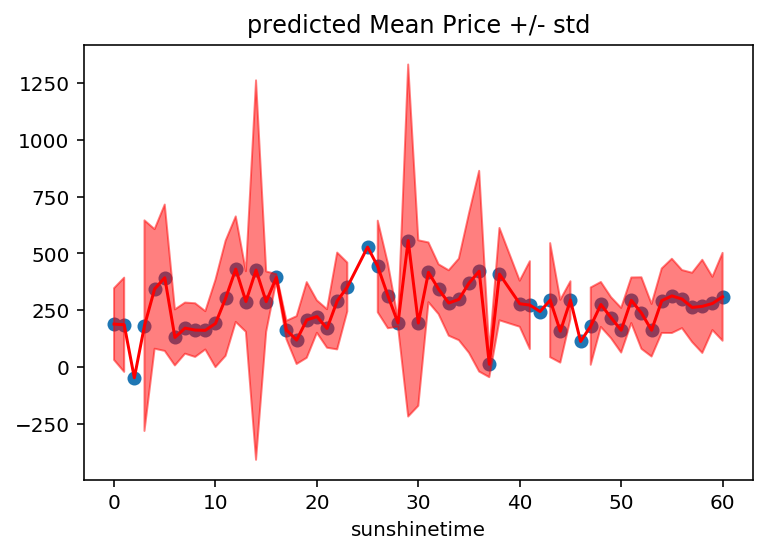

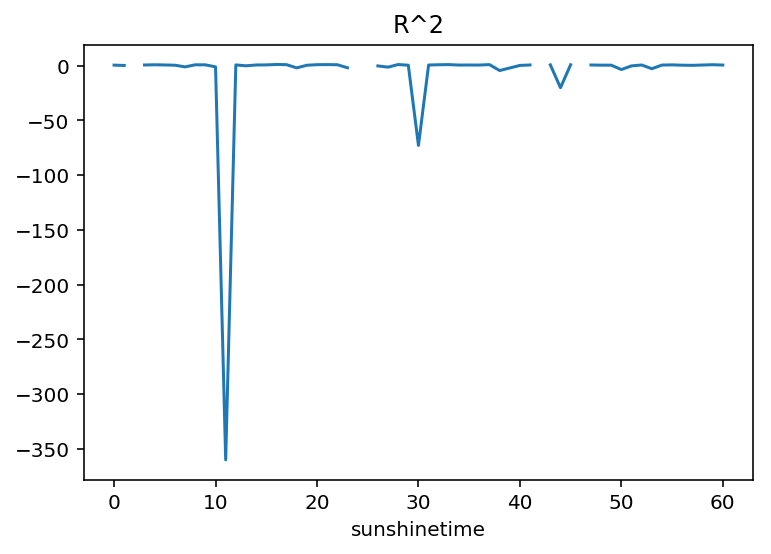

In [236]:
prediction_profile(df_test,'sunshinetime')

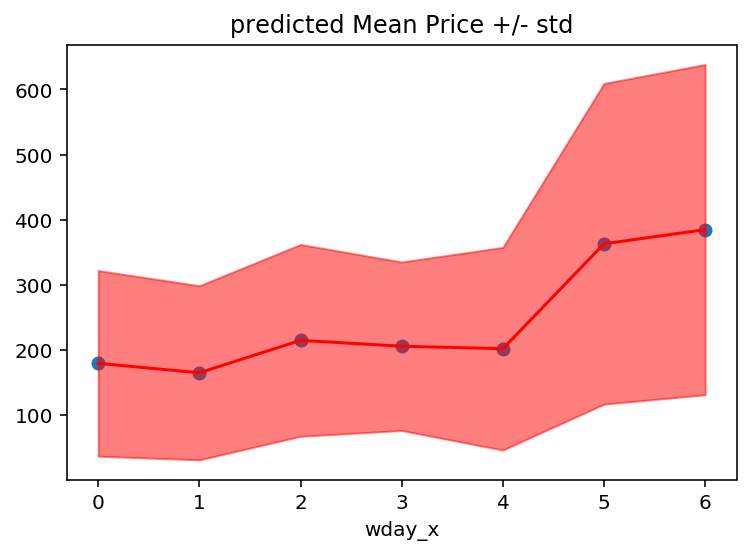

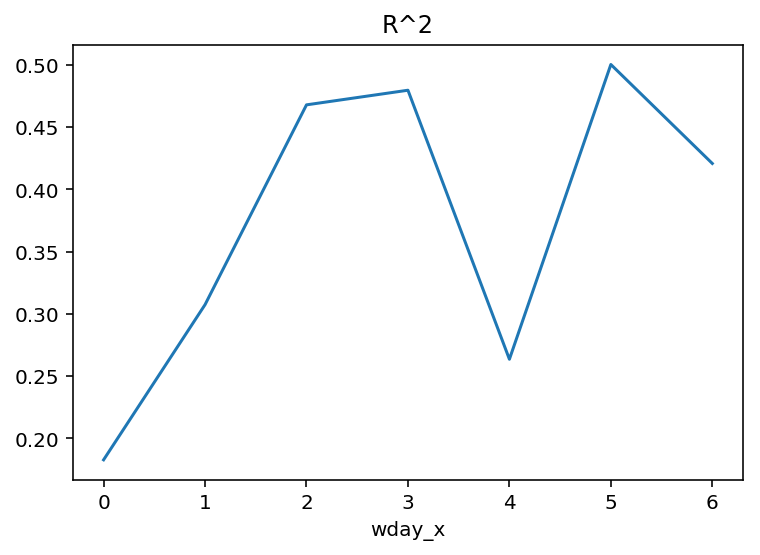

In [237]:
prediction_profile(df_test,'wday_x')

In [257]:
# KFold cross

#import sklearn.model_selection as model_selection
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#KF = model_selection.KFold(n_splits=5,random_state = 1)
#KF.get_n_splits(X)

#ls_y_predict = []
#ls_score = []
#ls_df_coef = []
#ls_y_test = []
#ls_y_train = []
#ls_X_test = []
#ls_X_train = []



In [258]:
#print X.shape
#print X.index
#X = X.reset_index(drop = True)
#print X.index


(3721, 90)
RangeIndex(start=0, stop=3721, step=1)


for train, test in KF.split(X):
    X_test = X.loc[test,:]
    X_test = X_test.reset_index(drop = True)
    
    y_test = y[test]
    y_test = y_test.reset_index(drop= True)
    
    print train
    print X.shape
    X_train = X.loc[train,:]
    print X_train.shape
    X_train = X_train.reset_index(drop = True)
    print X_train.shape
    
    y_train = y[train]
    y_train = y_train.reset_index(drop= True)
    
    scl = preprocessing.StandardScaler().fit(X_train)
    X_train_z = scl.transform(X_train)
    X_test_z = scl.transform(X_test)
    
    ls_y_test.append(y_test)
    ls_y_train.append(y_train)
    ls_X_test.append(X_test)
    ls_X_train.append(X_train)
    
    #model

    lso = Lasso(alpha = 0.001)
    lso.fit(X_train_z,y_train)
    ls_y_predict.append(lso.predict(X_test_z))
    ls_score.append(lso.score(X_test_z,y_test))

    print lso.score(X_test_z,y_test)
    coefficients = pd.DataFrame(data=lso.coef_,index=features)
    ls_df_coef.append(coefficients)
    coefficients.columns.values
    print coefficients[0].sort_values()
    
    
    
    
    


In [260]:
#ls_y_test

In [261]:
#ls_score

[-0.051956962179379396,
 0.33142541094680367,
 0.1038242218866343,
 0.17539397476603424,
 0.11684344937936308]

In [262]:
#print np.array(ls_score).std()

0.1236681480751417


In [263]:
#print np.array(ls_score).mean()

0.1351060189598912


In [246]:

#with open ('../results/model_Lasso_'+filename,'rb') as csvfile:
 #   outputwriter = csv.writer(csvfile,delimiter = ' ,')
  #  outputwriter.writerow('Description = '+description)
   # for score in ls_score:
    #    outputwriter.writerow(['score',str(score)])
    #outputwriter.writerow(str(np.array(ls_score).mean()))
    #outputwriter.writerow(str(np.array(ls_score).std()))

IOError: [Errno 2] No such file or directory: '../results/model_Lasso_shop1_resto_v2.csv'